## Let's look at the data!

In [1]:
import os,sys,time,random,math,time
import tarfile, zipfile

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from IPython.display import display, Image

from subprocess import check_output
datadir="./input/"
print(check_output(["ls", datadir]).decode("utf8"))

%matplotlib inline  


test.csv.zip
train.csv.zip



### Some base functions we use:

In [31]:
def loadData(datadir,filename):
    # Load the wholesale customers dataset
    #data = pd.read_csv(filename)
    data = ''
    print ("loading: "+datadir+filename)
    try:
        if zipfile.is_zipfile(datadir+filename):
            z = zipfile.ZipFile(datadir+filename)
            filename = z.open(filename[:-4])
        else:
            filename=datadir+filename
        data = pd.read_csv(filename, parse_dates=True)  
        print ("Dataset has {} samples with {} features each.".format(*data.shape))
    except Exception as e:
        print ("Dataset could not be loaded. Is the dataset missing?")
        print(e)
    return data

def writeData(data,filename):
    # Load the wholesale customers dataset
    try:
        data.to_csv(filename, index=False)
    except Exception as e:
        print ("Dataset could not be written.")
        print(e)
    verify=[]
    try:
        with open(filename, 'r') as f:
            for line in f:
                verify.append(line)
        f.closed
        return verify[:5]
    except IOError:
        sys.std

### load and look at the data:

In [36]:
data = loadData(datadir,'train.csv.zip')
display(data.info())
display(data.head(5))

test_data= loadData(datadir,'test.csv.zip') 
display(test_data.info())
display(test_data.head(5))

loading: ./input/train.csv.zip
Dataset has 188318 samples with 132 features each.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


None

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


loading: ./input/test.csv.zip
Dataset has 125546 samples with 131 features each.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125546 entries, 0 to 125545
Columns: 131 entries, id to cont14
dtypes: float64(14), int64(1), object(116)
memory usage: 125.5+ MB


None

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


### Check out the continous features

In [59]:
features = data.columns
cats = [feat for feat in features if 'cat' in feat]
conts = [feat for feat in features if 'cont' in feat]
print("total features:",len(features),"categories:",len(cats)," continuous:", len(conts))
print("average loss:",data['loss'].mean())


('total features:', 132, 'categories:', 116, ' continuous:', 14)
('average loss:', 3037.3376856699833)


,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,...,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000
mean,-0.002160,0.000440,0.000712,0.003416,-0.001671,0.001738,0.000393,-0.000568,0.000748,0.001073,...,-0.000212,-0.001244,-0.000975,-0.000964,-0.000509,-0.000843,-0.000849,-0.000882,-0.001948,0.000131
std,-0.001251,0.000059,0.001397,0.001347,-0.000550,0.000759,0.001220,-0.001064,0.000154,0.001059,...,-0.000092,-0.000301,-0.000200,-0.000179,-0.000474,-0.000073,-0.000662,-0.000721,-0.000331,-0.000125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001154
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.001912,-0.005160,0.000000,0.000000,0.000000,-0.006588,0.000000,-0.000142
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.000580,-0.000608,0.000000,0.000000,-0.005530,0.000000,0.000000,0.000000,0.001299
75%,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.004240,-0.000239,-0.005600,-0.002070,-0.005250,0.000000,-0.006654,0.000000,-0.000168
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000567,0.000000,0.000000,-0.002600,0.000000,0.000000,0.000912,0.001068,0.000000,0.000034


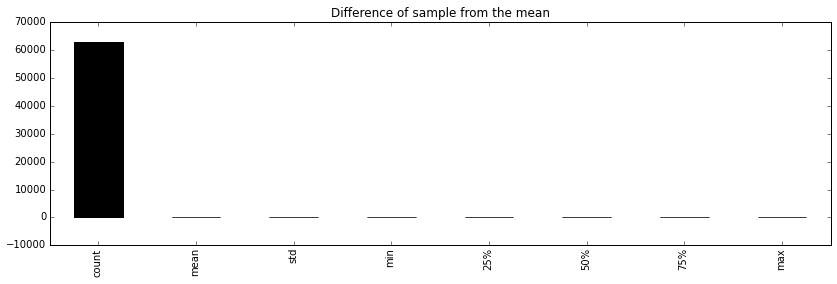

In [57]:
data_factorized=data.copy()
test_data_factorized=test_data.copy()
                                 
data_factorized_describe=data_factorized.drop(['id','loss'],1).describe()
test_data_factorized_describe=test_data_factorized.drop('id',1).describe()

diff_mean=pd.DataFrame()
for feat in data_factorized_describe:
    diff_mean[feat]=data_factorized_describe[feat] - test_data_factorized_describe[feat] 
display(diff_mean)

diff_mean.plot(kind='bar',legend = False, title = 'Difference of sample from the mean',figsize=(14,4))
    

The test and train sets look well matched, with similar avg/std/min/max between test and train

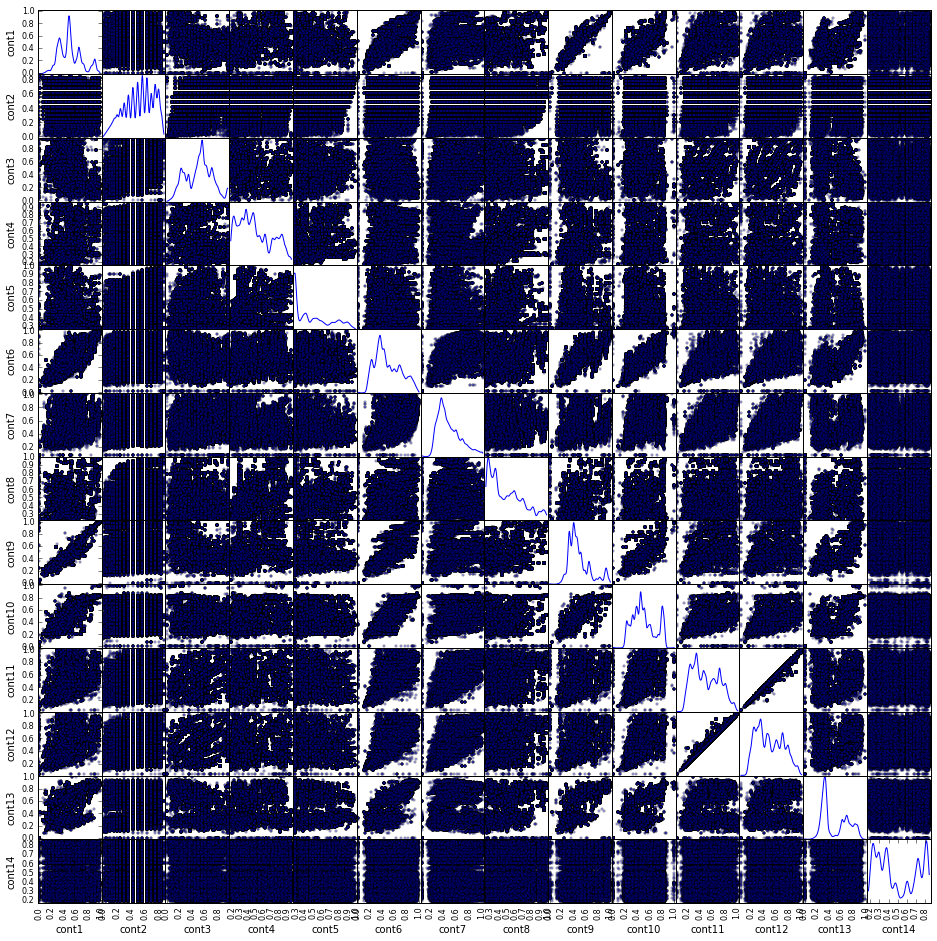

In [29]:
display(data_factorized[conts].describe())
pd.scatter_matrix(data_factorized[conts].drop(['id','loss'],1), alpha = 0.3, figsize = (16,16), diagonal = 'kde');

In [ ]:
data['loss'].plot(kind='hist',title='Loss'figsize = (14,8))

plt.show()

In [6]:
# hm....are all the values in the test_data seen in the train data?
for c in cats:
    values={}
    for v in data[c]:
        if v in values:
            values[v]+=1
        else:
            values[v]=1
    for v in test_data[c]:
        if v not in values:
            print(c,v,"not found in test!")
# hint...no they are not!

('cat89', 'F', 'not found in test!')
('cat89', 'F', 'not found in test!')
('cat92', 'G', 'not found in test!')
('cat92', 'E', 'not found in test!')
('cat92', 'E', 'not found in test!')
('cat96', 'H', 'not found in test!')
('cat99', 'U', 'not found in test!')
('cat103', 'M', 'not found in test!')
('cat106', 'Q', 'not found in test!')
('cat109', 'AD', 'not found in test!')
('cat109', 'AD', 'not found in test!')
('cat110', 'BH', 'not found in test!')
('cat110', 'CA', 'not found in test!')
('cat110', 'EN', 'not found in test!')
('cat111', 'L', 'not found in test!')
('cat113', 'AA', 'not found in test!')
('cat113', 'R', 'not found in test!')
('cat116', 'AQ', 'not found in test!')
('cat116', 'EM', 'not found in test!')
('cat116', 'FY', 'not found in test!')
('cat116', 'AI', 'not found in test!')
('cat116', 'N', 'not found in test!')
('cat116', 'ET', 'not found in test!')
('cat116', 'KO', 'not found in test!')
('cat116', 'BJ', 'not found in test!')
('cat116', 'IW', 'not found in test!')
('cat